# Introduction

## Motivation
We wanted to look which neighborhood has the best quality of life in Allegheny County. Some neighborhoods in Pittsburgh do not have the best neighborhoods in terms of accessibility to certain facilities. We intend to explore which neighborhoods include conditions that have the best quality of living. We aim to measure the quality of the life through the metrics listed below. 


# Our Metrics
We chose three different measurements to identify the best neighborhood in Pittsburgh.
1. Walkability
2. Access to food
3. Park availability
<br>
<br>Each neighborhood would have a given score that represents the combined scores of all three metrics with the higher score representing the better neighborhood.

### Walkability

### Food Accessibility
Each neighborhood is represented by its respected zip codes. Using the dataset "Supermarkets and Convenience Stores 2016 Data", we will be able to identify how many supermarkets and convenience stores are in each zip code. The zip code with the greater number of supermarkets and convenience stores combined will have a higher score.

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stores = pd.read_csv("data-conveniencesupermarkets.csv", sep=",")
stores.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


In [4]:
Dict={}
for index, row in stores.iterrows():
    zipcode = row['Zip']
    if zipcode in Dict:
        Dict[zipcode]+=1
    else:
        Dict[zipcode]=1

{15202.0: 9,
 15143.0: 5,
 15205.0: 15,
 15137.0: 9,
 15231.0: 1,
 15207.0: 4,
 15101.0: 8,
 15112.0: 3,
 15229.0: 9,
 15222.0: 21,
 15210.0: 18,
 15104.0: 6,
 15146.0: 22,
 15132.0: 19,
 15219.0: 17,
 15024.0: 4,
 15208.0: 6,
 15237.0: 28,
 15239.0: 6,
 15025.0: 5,
 15120.0: 10,
 15217.0: 11,
 15129.0: 2,
 15014.0: 2,
 15037.0: 8,
 15218.0: 8,
 15214.0: 3,
 15236.0: 16,
 15227.0: 15,
 15232.0: 4,
 15108.0: 19,
 15145.0: 4,
 15235.0: 16,
 15035.0: 1,
 15144.0: 1,
 15034.0: 1,
 15026.0: 2,
 15131.0: 8,
 15106.0: 9,
 15221.0: 16,
 15241.0: 6,
 15228.0: 6,
 15206.0: 17,
 15065.0: 5,
 15204.0: 3,
 15088.0: 2,
 15147.0: 11,
 15223.0: 5,
 16046.0: 1,
 15234.0: 6,
 15090.0: 12,
 15045.0: 2,
 15133.0: 1,
 15212.0: 17,
 15084.0: 8,
 15226.0: 8,
 15110.0: 4,
 15116.0: 6,
 15136.0: 17,
 15071.0: 8,
 15044.0: 12,
 15213.0: 17,
 15201.0: 7,
 15225.0: 2,
 15220.0: 8,
 15017.0: 9,
 15233.0: 3,
 15086.0: 2,
 15135.0: 1,
 15203.0: 8,
 15224.0: 11,
 15209.0: 4,
 15238.0: 9,
 15216.0: 7,
 15215.0: 6,
 15

The important information we want to extract from this dataset is the zip code. For each zip code we will count how many convenience stores or supermarkets are identified with that zip code. Now we want to connect the zip codes to zip code boundaries. Above we have a dictionary of zip codes and the amount of convenience stores and supermarkets in them. The next step is to link the zip codes to the neighborhoods. We will do that by connecting the zip code to the respective city. Let's look at all the neighborhoods in Allegheny County.

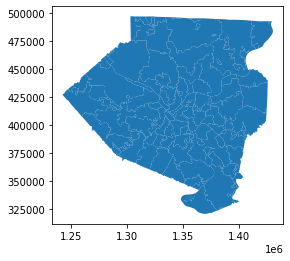

In [6]:
zipbounds = geopandas.read_file('Allegheny_County_Zip_Code_Boundaries.shp') # read in the shapefile
zipbounds.plot()

In [8]:
fips = pd.read_csv("County - Allegheny County - Pennsylvnia.csv")
fips.head()

,ZIP,CITY,COUNTY
0,15006,Bairdford,Allegheny
1,15007,Bakerstown,Allegheny
2,15014,Brackenridge,Allegheny
3,15015,Bradfordwoods,Allegheny
4,15017,Bridgeville,Allegheny


<BarContainer object of 100 artists>

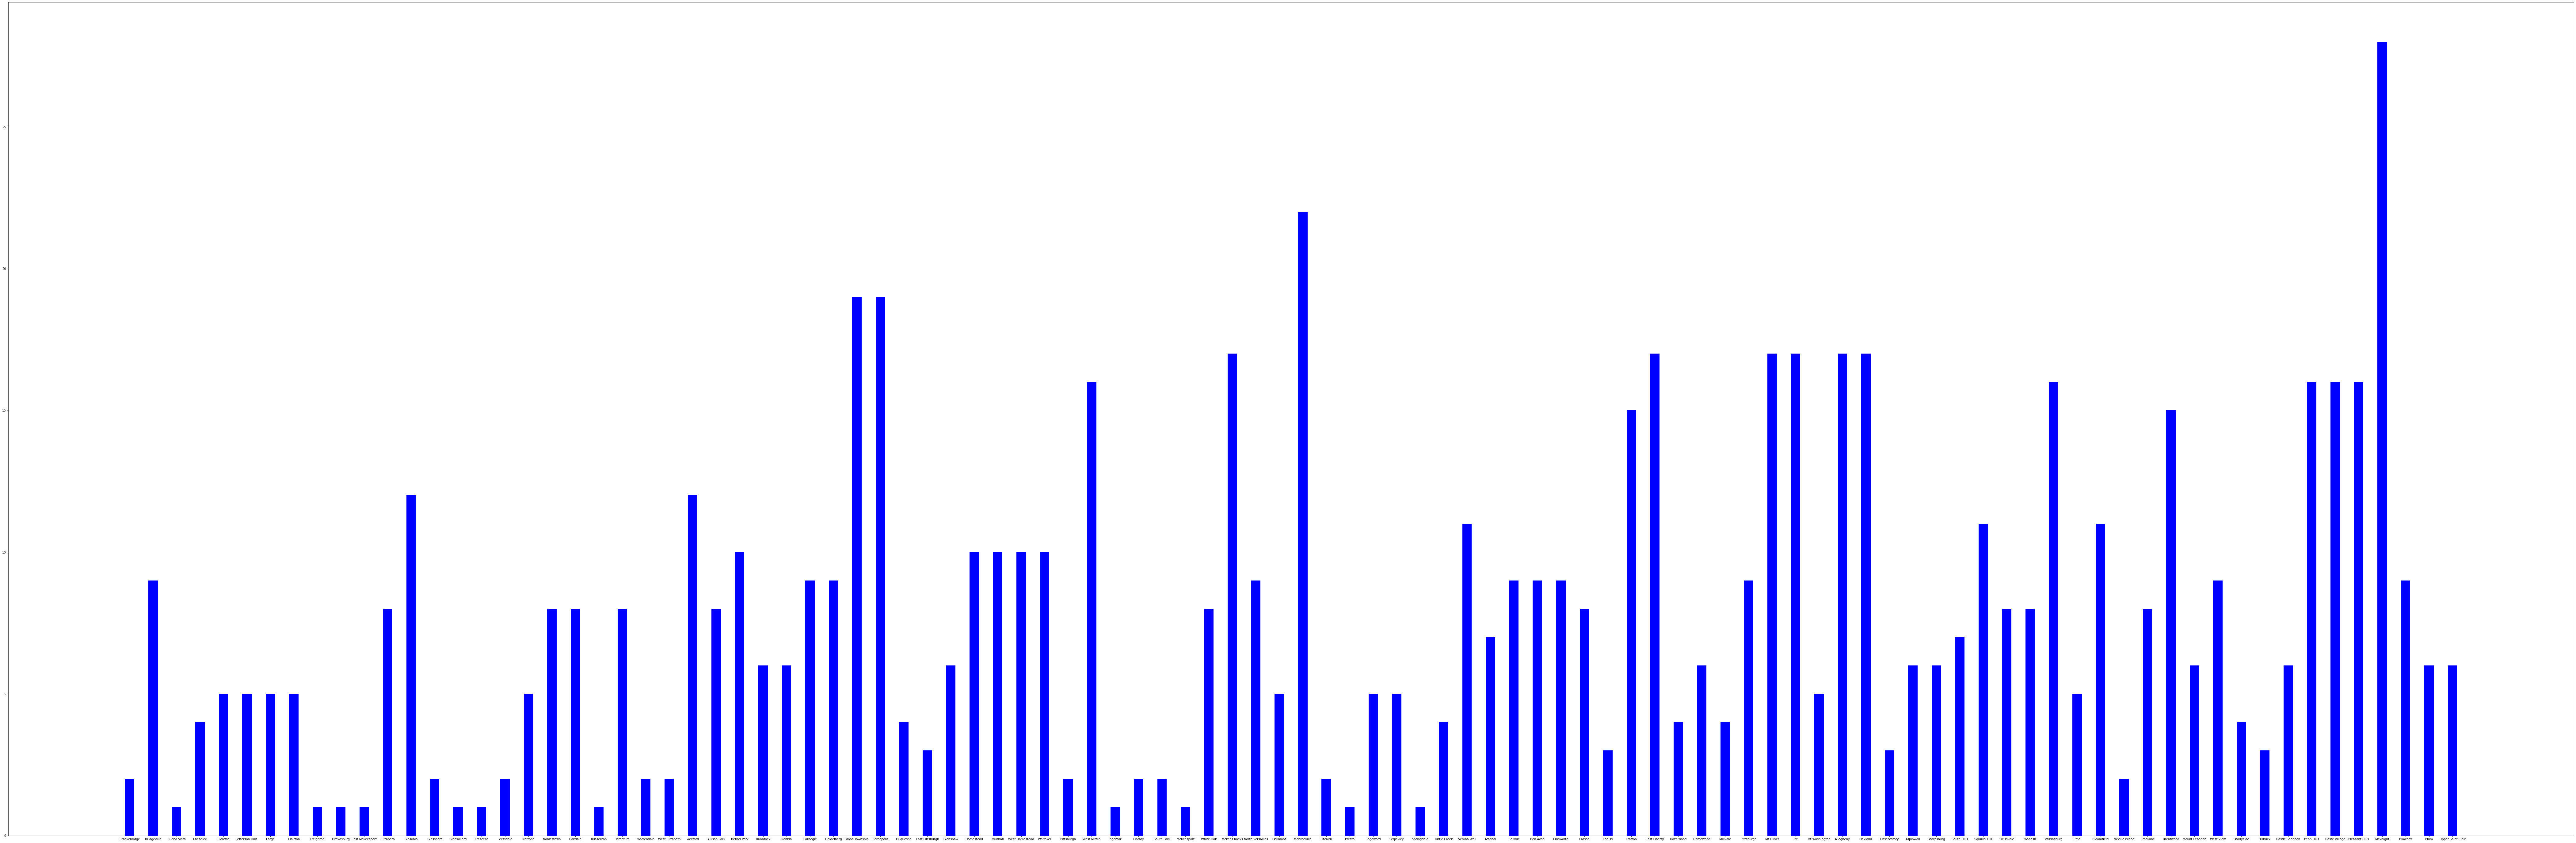

In [11]:
Dict2={}
Dict3={}
barchart={}
for index, row in fips.iterrows():
    zipcode2 = row['ZIP']
    city = row['CITY']
    Dict2[zipcode2]=city
    if zipcode2 in Dict:
        barchart[Dict2[zipcode2]]=Dict[zipcode2]
hoods = list(barchart.keys())
values = list(barchart.values())
fig = plt.figure(figsize = (150, 50))
 
# creating the bar plot
plt.bar(hoods, values, color ='blue',
        width = 0.4)

From the bar plot, we can see that the neighborhood of Mcknight has the greatest amount of convenience stores and supermarkets.

### Park Availability